## London Housing Dataset

### Annalyze average price, minimum and maximum price per area and per year, Analyze no of crimes per area.

In [ ]:
import pandas as pd

In [7]:
data= pd.read_csv(r"E:\DOWNLOAD\Portfolio Content\Python Files\5. London Housing Data.csv",parse_dates = True)

In [3]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


### 1. Explore the data.

In [4]:
data.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

In [6]:
data.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [9]:
data.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

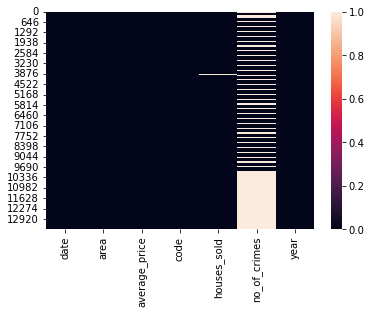

In [21]:
sns.heatmap(data.isnull())
plt.show()

### 2. Convert date column to datatime format.

In [25]:
data.date = pd.to_datetime(data.date)
data.head()

,date,area,Month,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,1,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,2,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,3,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,4,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,5,84409,E09000001,10.0,NaN,1995


### 3. Add a month column between Date and Area column.

In [30]:
data.insert(1,"Month",data.date.dt.month)


In [31]:
data.head(2)

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995


### 4. Drop Year and Date column.

In [32]:
data.drop(["Month","year"],axis=1,inplace=True)

In [33]:
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


### 5. Find records where no of crimes are zero and how many records are there?


In [34]:
data[data.no_of_crimes == 0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


### 6. What is the minimum and maximum 'average_price' per year in England?

In [38]:
data["year"] = data.date.dt.year

In [40]:
dfEng = data[data.area == "england"]

In [42]:
dfEng.groupby("year").average_price.min().head()

year
1995    52788
1996    52333
1997    55789
1998    61659
1999    65522
Name: average_price, dtype: int64

In [43]:
dfEng.groupby("year").average_price.max().head()

year
1995    53901
1996    55755
1997    61564
1998    65743
1999    75071
Name: average_price, dtype: int64

### 7. What is the mximum and mnimum no of crimes recorded per area ?

In [49]:
data.groupby("area").no_of_crimes.min().sort_values(ascending = False).head()

area
westminster    3504.0
lambeth        2381.0
southwark      2267.0
newham         2130.0
camden         2079.0
Name: no_of_crimes, dtype: float64

In [53]:
data.groupby("area").no_of_crimes.max().sort_values(ascending = False).head()

area
westminster    7461.0
lambeth        4701.0
camden         4558.0
southwark      3821.0
newham         3668.0
Name: no_of_crimes, dtype: float64

### 8. Show the total count of records of each area, where average price is less than 100000.


In [55]:
data[data.average_price < 100000].area.value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow              